In [5]:
from pulser import Register, Sequence
from pulser.devices import MockDevice

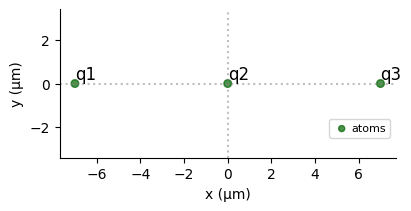

In [8]:
a = 7 # micrometers
qubits = {
    "q1": [-a, 0],
    "q2": [0, 0],
    "q3": [a, 0],
}
reg = Register(qubits)
reg.draw()

In [11]:
device = MockDevice
# we can use the device to return the value of the C6 coefficient
C6 = device.interaction_coeff
print(C6)

5420158.53


In [12]:
seq = Sequence(reg, device)

In [13]:
# to solve the MIS problem we want to use the adiabatic theorem
# which means:
# 1- start from the ground state of a certain Hamiltonian
# 2- evolve the system slowly
# 3- arrive at the target Hamiltonian

In [16]:
# The easiest state to prepare is the |0...0> state
# so we need to find a Hamiltoian that has |00...0> as its ground state
# this can be the Hamiltonian with zero amplitude and negative detuning

# The final Hamiltonian will be a Hamiltonina with zero amplitude
# and positive detuning, whose ground state is the MIS

In [17]:
from pulser import waveforms, Pulse

duration = 10000 # unit is nanoseconds

amplitude_waveform = waveforms.ConstantWaveform(duration, 0)
detuning_waveform = waveforms.RampWaveform(duration, -20, +20)

pulse = Pulse(
    amplitude = amplitude_waveform,
    detuning = detuning_waveform,
    phase = 0,
)

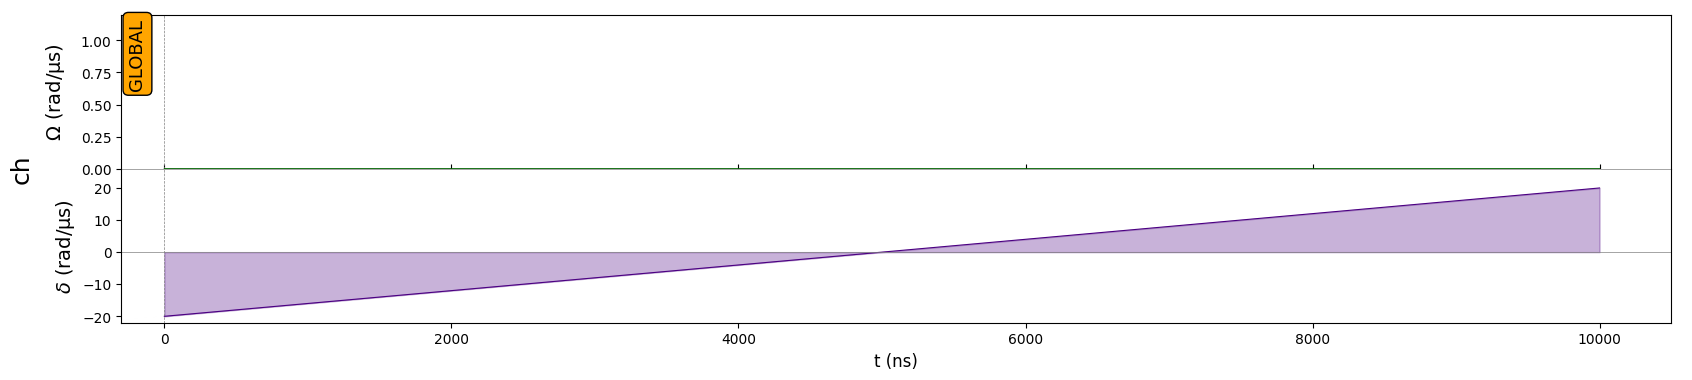

In [18]:
seq.declare_channel("ch", "rydberg_global")
seq.add(pulse, "ch")
seq.draw()

In [19]:
from pulser_simulation import QutipEmulator

sim = QutipEmulator.from_sequence(seq)
results = sim.run()

In [20]:
sampling = results.sample_final_state(N_samples=10000)

In [21]:
sampling

Counter({'000': 10000})

In [ ]:
# VERY BAD: the final state is just the |00...0> state where we started from.
# The reason is that there's an implicit assumption in the adiabatic theorem
# which says that the Hamiltonian cannot be diagonal. It has to have some
# off-diagonal terms during the evolution

In [24]:
duration = 10000 # unit is nanoseconds

amplitude_waveform = waveforms.InterpolatedWaveform(duration, [0, 10, 0], [0, 0.5, 1])
detuning_waveform = waveforms.RampWaveform(duration, -20, +20)

pulse = Pulse(
    amplitude = amplitude_waveform,
    detuning = detuning_waveform,
    phase = 0,
)

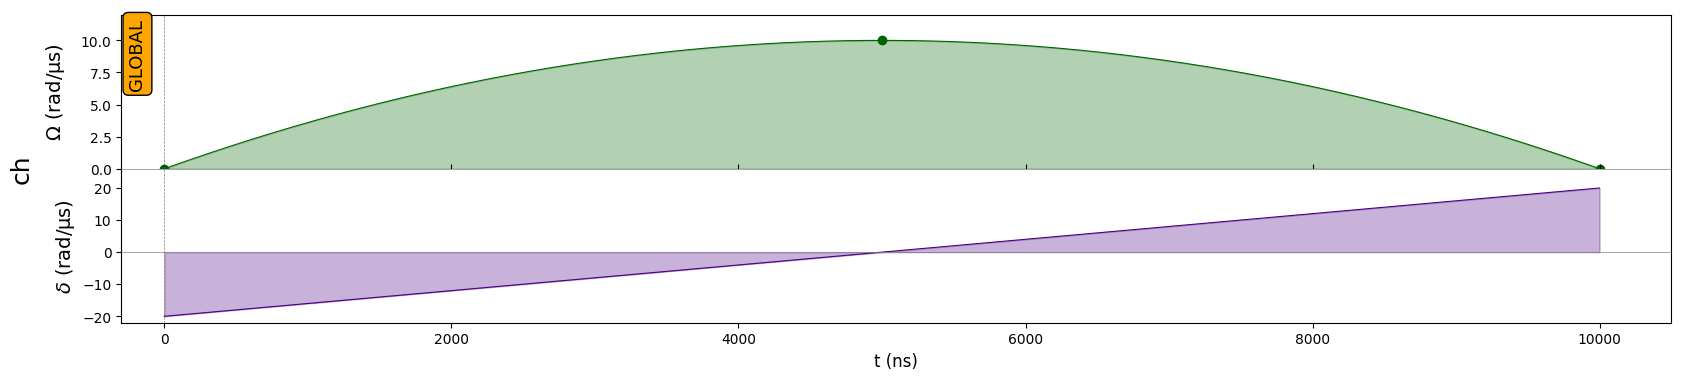

In [26]:
seq = Sequence(reg, device)
seq.declare_channel("ch", "rydberg_global")
seq.add(pulse, "ch")
seq.draw()

In [27]:
sim = QutipEmulator.from_sequence(seq)
results = sim.run()

sampling = results.sample_final_state(10000)

In [28]:
sampling

Counter({'101': 10000})

In [ ]:
# Now, with a non-zero amplitude in the middle of the sequence, everything works correctly
# and the final state is the MIS